# part a:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/htd2.csv")

# Drop rows with missing values (if any)
df = df.dropna()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical and numerical features
numerical_features = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
                      'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
                      'Smart_Devices_Count', 'Maintenance_Resolution_Time', 'Energy_Per_SqM',
                      'Number_of_Residents', 'Indoor_Air_Quality', 'Green_Certified']
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Target variable
target = 'Electricity_Bill'

# Manual Standard Scaling Function
def manual_standard_scaler(df, features):
    df_scaled = df.copy()
    for feature in features:
        mean = df_scaled[feature].mean()
        std = df_scaled[feature].std()
        df_scaled[feature] = (df_scaled[feature] - mean) / std
    return df_scaled

# Normalize numerical features manually
df = manual_standard_scaler(df, numerical_features)

# Split the dataset into features and target variable
x = df[numerical_features + categorical_features]  # Features
y = df[target]  # Target variable

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")

 Pair Plot for Numerical Features
plt.figure(figsize=(15, 10))
sns.pairplot(df[numerical_features])
plt.suptitle("Pair Plot for Numerical Features", y=1.02)
plt.show()

#  Plots for Numeriiiii
plt.figure(figsize=(15, 10))
df[numerical_features].plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 15), sharex=False, sharey=False)
plt.suptitle("Box Plots for Numerical Features", y=1.02)
plt.show()

# Violin
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.violinplot(data=df, y=feature)
    plt.title(f"Violin Plot - {feature}")
plt.tight_layout()
plt.show()

# 4. Count Plots for Categorical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 1, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(f"Count Plot - {feature}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

5 insights:
For the pair plots:
  1. Occupancy_rate and air_index_quality shows clustering.

  2. many of the features had scattered points with respect to the electricity bill which shows that they are not going to be much helpful in determining the target data while others such as Green certified and number of floors and smart_devices_count had a pattern which might be useful.

Violin Plots:
  3. The density in the plots help us in understanding the consistency of the distribution.

  4. Green_certified and building_type show a narrowing in the middle which shows that there are outliers and extreme values in the distributions of the dataset.

Box Plots:
  5. The water_usage per building is centered around the mean with less outliers.

  6. The data is symmetrix which means that water usage is balanced around the buildings.

  7. occupancy rates are tightly packed around the median.

Heat Map:
  8. There is a Strong Positive Correlation Between "Smart Devices Count" and "Green Certified" , the fields with the highest magnitude values are highly correlated.

  9. The three features: number_of_residents, building_type and and Green_certified are the most dependent features for the electricity_bill as seen from the last row.

#part b:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


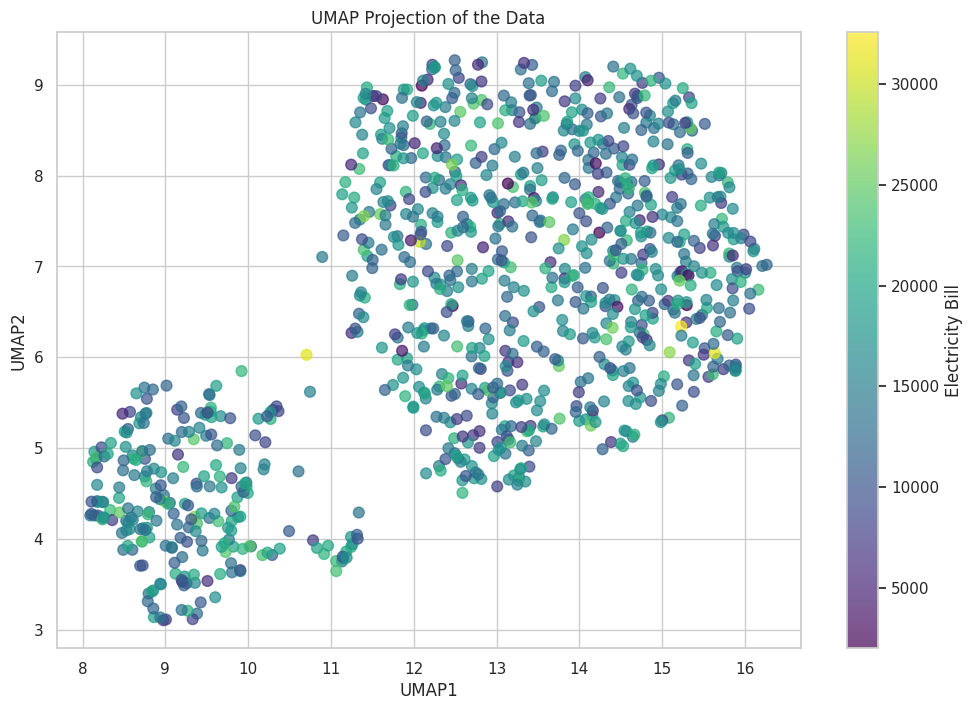

In [ ]:
!pip install umap-learn
import umap
x_train_array = x_train.to_numpy()

umap_model = umap.UMAP(n_components=2, random_state=42)
x_umap = umap_model.fit_transform(x_train_array)

umap_df = pd.DataFrame(x_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Target'] = y_train.values

plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Target'], cmap='viridis', s=60, alpha=0.7)
plt.title("UMAP Projection of the Data")
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Electricity Bill')
plt.show()

There are two different clusters of data which shows that there is some kind of pattern.

But at the same time the high amount of scattering shows that the dataset is not good enough and the distribution is random.

#part c:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R2 score
def adjusted_r2(r2, x):
    n = x.shape[0]  #  sampleeees
    p = x.shape[1]  # no oof fetures
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adjusted_r2_train = adjusted_r2(r2_train, x_train)
adjusted_r2_test = adjusted_r2(r2_test, x_test)

print("Train Data:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")
print(f"R2 Score: {r2_train}")
print(f"Adjusted R2 Score: {adjusted_r2_train}")

print("\nTest Data:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R2 Score: {r2_test}")
print(f"Adjusted R2 Score: {adjusted_r2_test}")


Train Data:
MSE: 24475013.16847547
RMSE: 4947.222773281538
MAE: 4006.3284693293604
R2 Score: 0.013922520844610209
Adjusted R2 Score: -0.0011091480449536562

Test Data:
MSE: 24278016.155742623
RMSE: 4927.272689403604
MAE: 3842.409312558516
R2 Score: 3.7344733075372893e-05
Adjusted R2 Score: -0.0640628254763429


#part d:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]
print(f"Top 3 selected features: {list(selected_features)}")

x_train_rfe = x_train[selected_features]
x_test_rfe = x_test[selected_features]

lr_model_rfe = LinearRegression()
lr_model_rfe.fit(x_train_rfe, y_train)

y_train_pred_rfe = lr_model_rfe.predict(x_train_rfe)
y_test_pred_rfe = lr_model_rfe.predict(x_test_rfe)

mse_train_rfe = mean_squared_error(y_train, y_train_pred_rfe)
mse_test_rfe = mean_squared_error(y_test, y_test_pred_rfe)

#testingggg
rmse_train_rfe = np.sqrt(mse_train_rfe)
rmse_test_rfe = np.sqrt(mse_test_rfe)

mae_train_rfe = mean_absolute_error(y_train, y_train_pred_rfe)
mae_test_rfe = mean_absolute_error(y_test, y_test_pred_rfe)

r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
r2_test_rfe = r2_score(y_test, y_test_pred_rfe)

adjusted_r2_train_rfe = adjusted_r2(r2_train_rfe, x_train_rfe)
adjusted_r2_test_rfe = adjusted_r2(r2_test_rfe, x_test_rfe)

print("\nTrain Data with Selected Features (RFE):")
print(f"MSE: {mse_train_rfe}")
print(f"RMSE: {rmse_train_rfe}")
print(f"MAE: {mae_train_rfe}")
print(f"R2 Score: {r2_train_rfe}")
print(f"Adjusted R2 Score: {adjusted_r2_train_rfe}")

print("\nTest Data with Selected Features (RFE):")
print(f"MSE: {mse_test_rfe}")
print(f"RMSE: {rmse_test_rfe}")
print(f"MAE: {mae_test_rfe}")
print(f"R2 Score: {r2_test_rfe}")
print(f"Adjusted R2 Score: {adjusted_r2_test_rfe}")


Top 3 selected features: ['Number_of_Residents', 'Green_Certified', 'Building_Type']

Train Data with Selected Features (RFE):
MSE: 24569032.906897984
RMSE: 4956.715939702212
MAE: 4006.473377514736
R2 Score: 0.010134545491284008
Adjusted R2 Score: 0.007153023037944517

Test Data with Selected Features (RFE):
MSE: 23941409.062998377
RMSE: 4892.995918964002
MAE: 3813.948128176773
R2 Score: 0.01390151386794114
Adjusted R2 Score: 0.0018759225736477703


comparison with part c:

Mean Squared Error (MSE):
  Train Data: Slightly higher with RFE (24,569,032.91) compared to the part c model (24,475,013.17).

  Test Data: Lower with RFE (23,941,409.06) compared to the part c model (24,278,016.16).

Root Mean Squared Error (RMSE):
  Train Data: Slightly higher with RFE (4,956.72) compared to the original model (4,947.22).

  Test Data: Lower with RFE (4,892.99) compared to the original model (4,927.27).

R2 Score:
  Train Data: Slightly lower with RFE (0.0101) compared to the original model (0.0139).

  Test Data: Higher with RFE (0.0139) compared to the original model (0.000037).


Performance on Training Data: The RFE model shows a slightly higher MSE and RMSE compared to the original model but with very similar MAE. The R2 and Adjusted R2 scores are slightly lower with RFE.

Ant the performance on the Test Data:The RFE model shows improvements in MSE, RMSE, MAE, and R2 compared to the original model. The Adjusted R2 score is also better with RFE.


#test e:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

onehot_encoder = OneHotEncoder(drop='first', sparse=False)  # Drop first to avoid multicollinearity
categorical_encoded = onehot_encoder.fit_transform(df[categorical_features])

categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

x_encoded = pd.concat([df[numerical_features], categorical_encoded_df], axis=1)

=x_train_encoded, x_test_encoded, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(x_train_encoded, y_train)

y_train_pred_ridge = ridge_model.predict(x_train_encoded)
y_test_pred_ridge = ridge_model.predict(x_test_encoded)

# MSE
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# RMSE
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

# MAE
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# R2 Score
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

adjusted_r2_train_ridge = adjusted_r2(r2_train_ridge, x_train_encoded)
adjusted_r2_test_ridge = adjusted_r2(r2_test_ridge, x_test_encoded)

print("\nTrain Data (Ridge Regression with One-Hot Encoded Categorical Features):")
print(f"MSE: {mse_train_ridge}")
print(f"RMSE: {rmse_train_ridge}")
print(f"MAE: {mae_train_ridge}")
print(f"R2 Score: {r2_train_ridge}")
print(f"Adjusted R2 Score: {adjusted_r2_train_ridge}")

print("\nTest Data (Ridge Regression with One-Hot Encoded Categorical Features):")
print(f"MSE: {mse_test_ridge}")
print(f"RMSE: {rmse_test_ridge}")
print(f"MAE: {mae_test_ridge}")
print(f"R2 Score: {r2_test_ridge}")
print(f"Adjusted R2 Score: {adjusted_r2_test_ridge}")


Train Data (Ridge Regression with One-Hot Encoded Categorical Features):
MSE: 24188934.340711236
RMSE: 4918.22471433659
MAE: 3976.7355960585223
R2 Score: 0.025448393675797765
Adjusted R2 Score: 0.006554025798083618

Test Data (Ridge Regression with One-Hot Encoded Categorical Features):
MSE: 24128288.424410056
RMSE: 4912.055417481572
MAE: 3797.5125456363867
R2 Score: 0.006204328840423434
Adjusted R2 Score: -0.07589183529884602


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Overall Performance: Ridge Regression with one-hot encoding generally outperforms the original model in terms of error metrics, particularly on the training data. The RFE model, while performing well on test data, does not consistently outperform Ridge Regression.

Feature Selection Impact: The Ridge Regression model benefits from incorporating one-hot encoded categorical features, showing improved performance over the original model. RFE did improve test data performance but was less effective on training data compared to Ridge Regression.

#part f:

In [ ]:

from sklearn.decomposition import FastICA

def evaluate_model(x_train, x_test, y_train, y_test):
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(x_train, y_train)

    y_train_pred = ridge_model.predict(x_train)
    y_test_pred = ridge_model.predict(x_test)

    # Calculate Evaluation Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_train = adjusted_r2(r2_train, x_train)
    adjusted_r2_test = adjusted_r2(r2_test, x_test)

    return {
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
        "Adjusted R2 Train": adjusted_r2_train,
        "Adjusted R2 Test": adjusted_r2_test
    }

components_to_try = [4, 5, 6, 8]

for n_components in components_to_try:
    print(f"\nEvaluating ICA with {n_components} components:")

    ica = FastICA(n_components=n_components, random_state=42)
    x_train_ica = ica.fit_transform(x_train_encoded)
    x_test_ica = ica.transform(x_test_encoded)

    results = evaluate_model(x_train_ica, x_test_ica, y_train, y_test)

    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")



Evaluating ICA with 4 components:
MSE Train: 24691015.1735
MSE Test: 24445533.4369
RMSE Train: 4969.0055
RMSE Test: 4944.2425
MAE Train: 4013.6441
MAE Test: 3852.4464
R2 Train: 0.0052
R2 Test: -0.0069
Adjusted R2 Train: 0.0012
Adjusted R2 Test: -0.0233

Evaluating ICA with 5 components:
MSE Train: 24665150.1429
MSE Test: 24499301.9259
RMSE Train: 4966.4021
RMSE Test: 4949.6770
MAE Train: 4013.1603
MAE Test: 3850.9878
R2 Train: 0.0063
R2 Test: -0.0091
Adjusted R2 Train: 0.0013
Adjusted R2 Test: -0.0298

Evaluating ICA with 6 components:
MSE Train: 24663787.0959
MSE Test: 24473494.4960
RMSE Train: 4966.2649
RMSE Test: 4947.0693
MAE Train: 4013.2170
MAE Test: 3847.9924
R2 Train: 0.0063
R2 Test: -0.0080
Adjusted R2 Train: 0.0003
Adjusted R2 Test: -0.0329

Evaluating ICA with 8 components:
MSE Train: 24634815.0313
MSE Test: 24610827.6363
RMSE Train: 4963.3472
RMSE Test: 4960.9301
MAE Train: 4021.0477
MAE Test: 3867.3050
R2 Train: 0.0075
R2 Test: -0.0137
Adjusted R2 Train: -0.0005
Adjusted 

#part g:

In [ ]:

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Mixing parameter values

results = {
    'Alpha': [],
    'MSE Train': [],
    'RMSE Train': [],
    'MAE Train': [],
    'R2 Train': [],
    'Adjusted R2 Train': [],
    'MSE Test': [],
    'RMSE Test': [],
    'MAE Test': [],
    'R2 Test': [],
    'Adjusted R2 Test': []
}

for alpha in alpha_values:
=    elastic_net_model = ElasticNet(alpha=alpha, random_state=42)

    elastic_net_model.fit(x_train_encoded, y_train)

    y_train_pred = elastic_net_model.predict(x_train_encoded)
    y_test_pred = elastic_net_model.predict(x_test_encoded)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_train = adjusted_r2(r2_train, x_train_encoded)
    adjusted_r2_test = adjusted_r2(r2_test, x_test_encoded)

    # Append the results for the current alpha value
    results['Alpha'].append(alpha)
    results['MSE Train'].append(mse_train)
    results['RMSE Train'].append(rmse_train)
    results['MAE Train'].append(mae_train)
    results['R2 Train'].append(r2_train)
    results['Adjusted R2 Train'].append(adjusted_r2_train)
    results['MSE Test'].append(mse_test)
    results['RMSE Test'].append(rmse_test)
    results['MAE Test'].append(mae_test)
    results['R2 Test'].append(r2_test)
    results['Adjusted R2 Test'].append(adjusted_r2_test)

results_df = pd.DataFrame(results)

print("\nElasticNet Regularization Evaluation Metrics:")
print(results_df)


ElasticNet Regularization Evaluation Metrics:
   Alpha     MSE Train   RMSE Train    MAE Train  R2 Train  Adjusted R2 Train  \
0    0.1  2.420252e+07  4919.605309  3979.192304  0.024901           0.005996   
1    0.5  2.429893e+07  4929.394570  3987.616848  0.021017           0.002036   
2    1.0  2.438829e+07  4938.450376  3993.314394  0.017416          -0.001634   
3    2.0  2.449485e+07  4949.227251  3998.095697  0.013123          -0.006010   
4    5.0  2.463037e+07  4962.899854  4002.744192  0.007663          -0.011576   

       MSE Test    RMSE Test     MAE Test   R2 Test  Adjusted R2 Test  
0  2.407340e+07  4906.464753  3797.967118  0.008465         -0.073444  
1  2.405711e+07  4904.805259  3803.691440  0.009136         -0.072718  
2  2.409151e+07  4908.310642  3810.134469  0.007719         -0.074252  
3  2.414857e+07  4914.119642  3819.139026  0.005369         -0.076796  
4  2.423335e+07  4922.737818  3828.868990  0.001877         -0.080576  


#part h:

In [ ]:
#part h:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gbr_model.fit(x_train_encoded, y_train)

# Make predictions on the train and test sets
y_train_pred_gbr = gbr_model.predict(x_train_encoded)
y_test_pred_gbr = gbr_model.predict(x_test_encoded)

# Calculate Mean Squared Error (MSE) for Gradient Boosting Regressor
mse_train_gbr = mean_squared_error(y_train, y_train_pred_gbr)
mse_test_gbr = mean_squared_error(y_test, y_test_pred_gbr)

# Calculate Root Mean Squared Error (RMSE) for Gradient Boosting Regressor
rmse_train_gbr = np.sqrt(mse_train_gbr)
rmse_test_gbr = np.sqrt(mse_test_gbr)

# Calculate Mean Absolute Error (MAE) for Gradient Boosting Regressor
mae_train_gbr = mean_absolute_error(y_train, y_train_pred_gbr)
mae_test_gbr = mean_absolute_error(y_test, y_test_pred_gbr)

# Calculate R2 score for Gradient Boosting Regressor
r2_train_gbr = r2_score(y_train, y_train_pred_gbr)
r2_test_gbr = r2_score(y_test, y_test_pred_gbr)

# Calculate Adjusted R2 score for Gradient Boosting Regressor
adjusted_r2_train_gbr = adjusted_r2(r2_train_gbr, x_train_encoded)
adjusted_r2_test_gbr = adjusted_r2(r2_test_gbr, x_test_encoded)

# Print all the evaluation metrics for Gradient Boosting Regressor
print("\nTrain Data (Gradient Boosting Regressor):")
print(f"MSE: {mse_train_gbr}")
print(f"RMSE: {rmse_train_gbr}")
print(f"MAE: {mae_train_gbr}")
print(f"R2 Score: {r2_train_gbr}")
print(f"Adjusted R2 Score: {adjusted_r2_train_gbr}")

print("\nTest Data (Gradient Boosting Regressor):")
print(f"MSE: {mse_test_gbr}")
print(f"RMSE: {rmse_test_gbr}")
print(f"MAE: {mae_test_gbr}")
print(f"R2 Score: {r2_test_gbr}")
print(f"Adjusted R2 Score: {adjusted_r2_test_gbr}")

# Comparison of Results
print("\nComparison of Results:")
print(f"Linear Regression Test Data - MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}, R2 Score: {r2_test}, Adjusted R2 Score: {adjusted_r2_test}")
print(f"Ridge Regression Test Data - MSE: {mse_test_ridge}, RMSE: {rmse_test_ridge}, MAE: {mae_test_ridge}, R2 Score: {r2_test_ridge}, Adjusted R2 Score: {adjusted_r2_test_ridge}")
print(f"Gradient Boosting Regressor Test Data - MSE: {mse_test_gbr}, RMSE: {rmse_test_gbr}, MAE: {mae_test_gbr}, R2 Score: {r2_test_gbr}, Adjusted R2 Score: {adjusted_r2_test_gbr}")



Train Data (Gradient Boosting Regressor):
MSE: 15548098.780395454
RMSE: 3943.1077566299723
MAE: 3155.777526146695
R2 Score: 0.373580314523429
Adjusted R2 Score: 0.36143544307031183

Test Data (Gradient Boosting Regressor):
MSE: 24868467.60197402
RMSE: 4986.82941376322
MAE: 3850.400448176846
R2 Score: -0.02428216276672046
Adjusted R2 Score: -0.10889677621266691

Comparison of Results:
Linear Regression Test Data - MSE: 24233347.620866563, RMSE: 4922.737817603794, MAE: 3828.8689898388943, R2 Score: 0.0018771518431379697, Adjusted R2 Score: -0.0805764747437332
Ridge Regression Test Data - MSE: 24128288.424410056, RMSE: 4912.055417481572, MAE: 3797.5125456363867, R2 Score: 0.006204328840423434, Adjusted R2 Score: -0.07589183529884602
Gradient Boosting Regressor Test Data - MSE: 24868467.60197402, RMSE: 4986.82941376322, MAE: 3850.400448176846, R2 Score: -0.02428216276672046, Adjusted R2 Score: -0.10889677621266691


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Performance on Test Data: The Gradient Boosting Regressor performs worse across all metrics compared to both Linear Regression and Ridge Regression. It has the highest MSE, RMSE, and MAE, and the lowest R2 and Adjusted R2 scores, indicating it is less effective at making accurate predictions and explaining the variance in the target variable.

Model Effectiveness: Ridge Regression shows the best performance among the models in terms of both MSE and MAE, with relatively low RMSE and better R2 scores. Linear Regression performs slightly worse than Ridge Regression but better than Gradient Boosting Regressor. Gradient Boosting Regressor, despite being a more complex model, does not show improvements over the simpler models in this case, possibly due to overfitting or inappropriate hyperparameters for this dataset.
g
In summary, Ridge Regression seems to be the most effective model for this particular dataset based on the metrics provided.